In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\hp'

In [4]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\big mart train.csv')

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.shape

(8523, 12)

In [7]:
df1 = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\big mart test.csv')

In [8]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
df1.shape

(5681, 11)

In [10]:
# consider train data 

In [11]:
#EDA

In [12]:
df.shape

(8523, 12)

In [13]:
df['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

In [14]:
#regression problem

In [15]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [16]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
#null values are there so remove

In [19]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)

In [20]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace = True)

In [21]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
#no null values proceed data set

In [23]:
#so some columns are string so used encoding 

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [26]:
df.dtypes

Item_Identifier              int32
Item_Weight                  int64
Item_Fat_Content             int32
Item_Visibility              int64
Item_Type                    int32
Item_MRP                     int64
Outlet_Identifier            int32
Outlet_Establishment_Year    int64
Outlet_Size                  int32
Outlet_Location_Type         int32
Outlet_Type                  int32
Item_Outlet_Sales            int64
dtype: object

In [27]:
# numerical convert use encoding proceed data set

In [28]:
#data visluzation

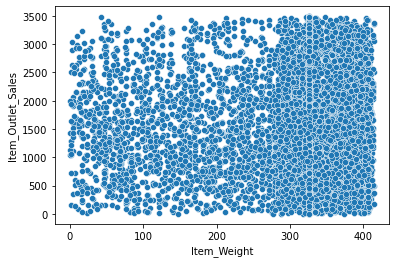

In [29]:
sns.scatterplot(data=df,x='Item_Weight',y='Item_Outlet_Sales')
plt.show()

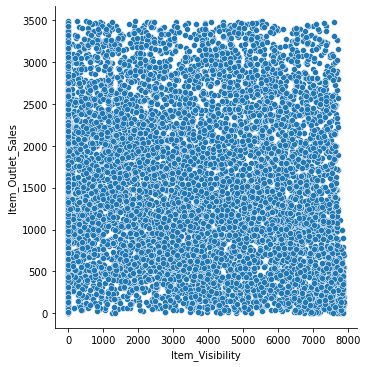

In [30]:
sns.relplot(data=df,x='Item_Visibility',y='Item_Outlet_Sales')
plt.show()

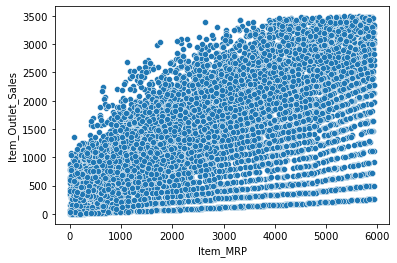

In [31]:
sns.scatterplot(data=df,x='Item_MRP',y='Item_Outlet_Sales')
plt.show()

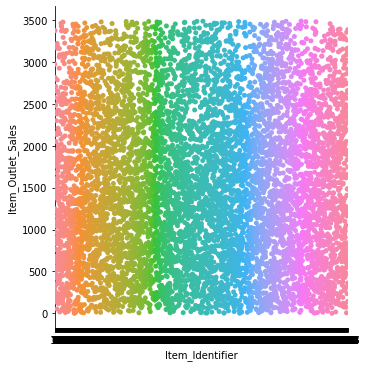

In [32]:
sns.catplot(data=df,x='Item_Identifier',y='Item_Outlet_Sales')
plt.show()

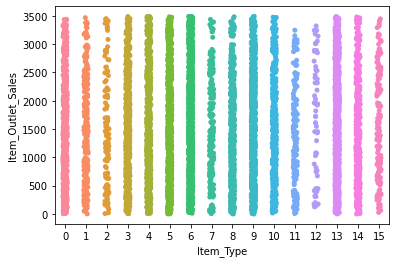

In [33]:
sns.stripplot(data=df,x='Item_Type',y='Item_Outlet_Sales')
plt.show()

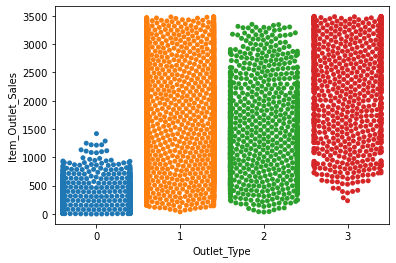

In [34]:
sns.swarmplot(data=df,x='Outlet_Type',y='Item_Outlet_Sales')
plt.show()

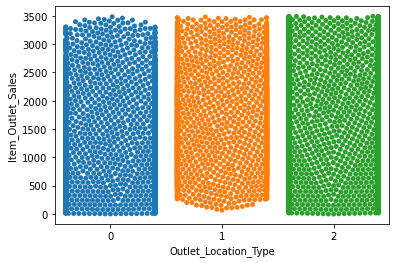

In [35]:
sns.swarmplot(data=df,x='Outlet_Location_Type',y='Item_Outlet_Sales')
plt.show()

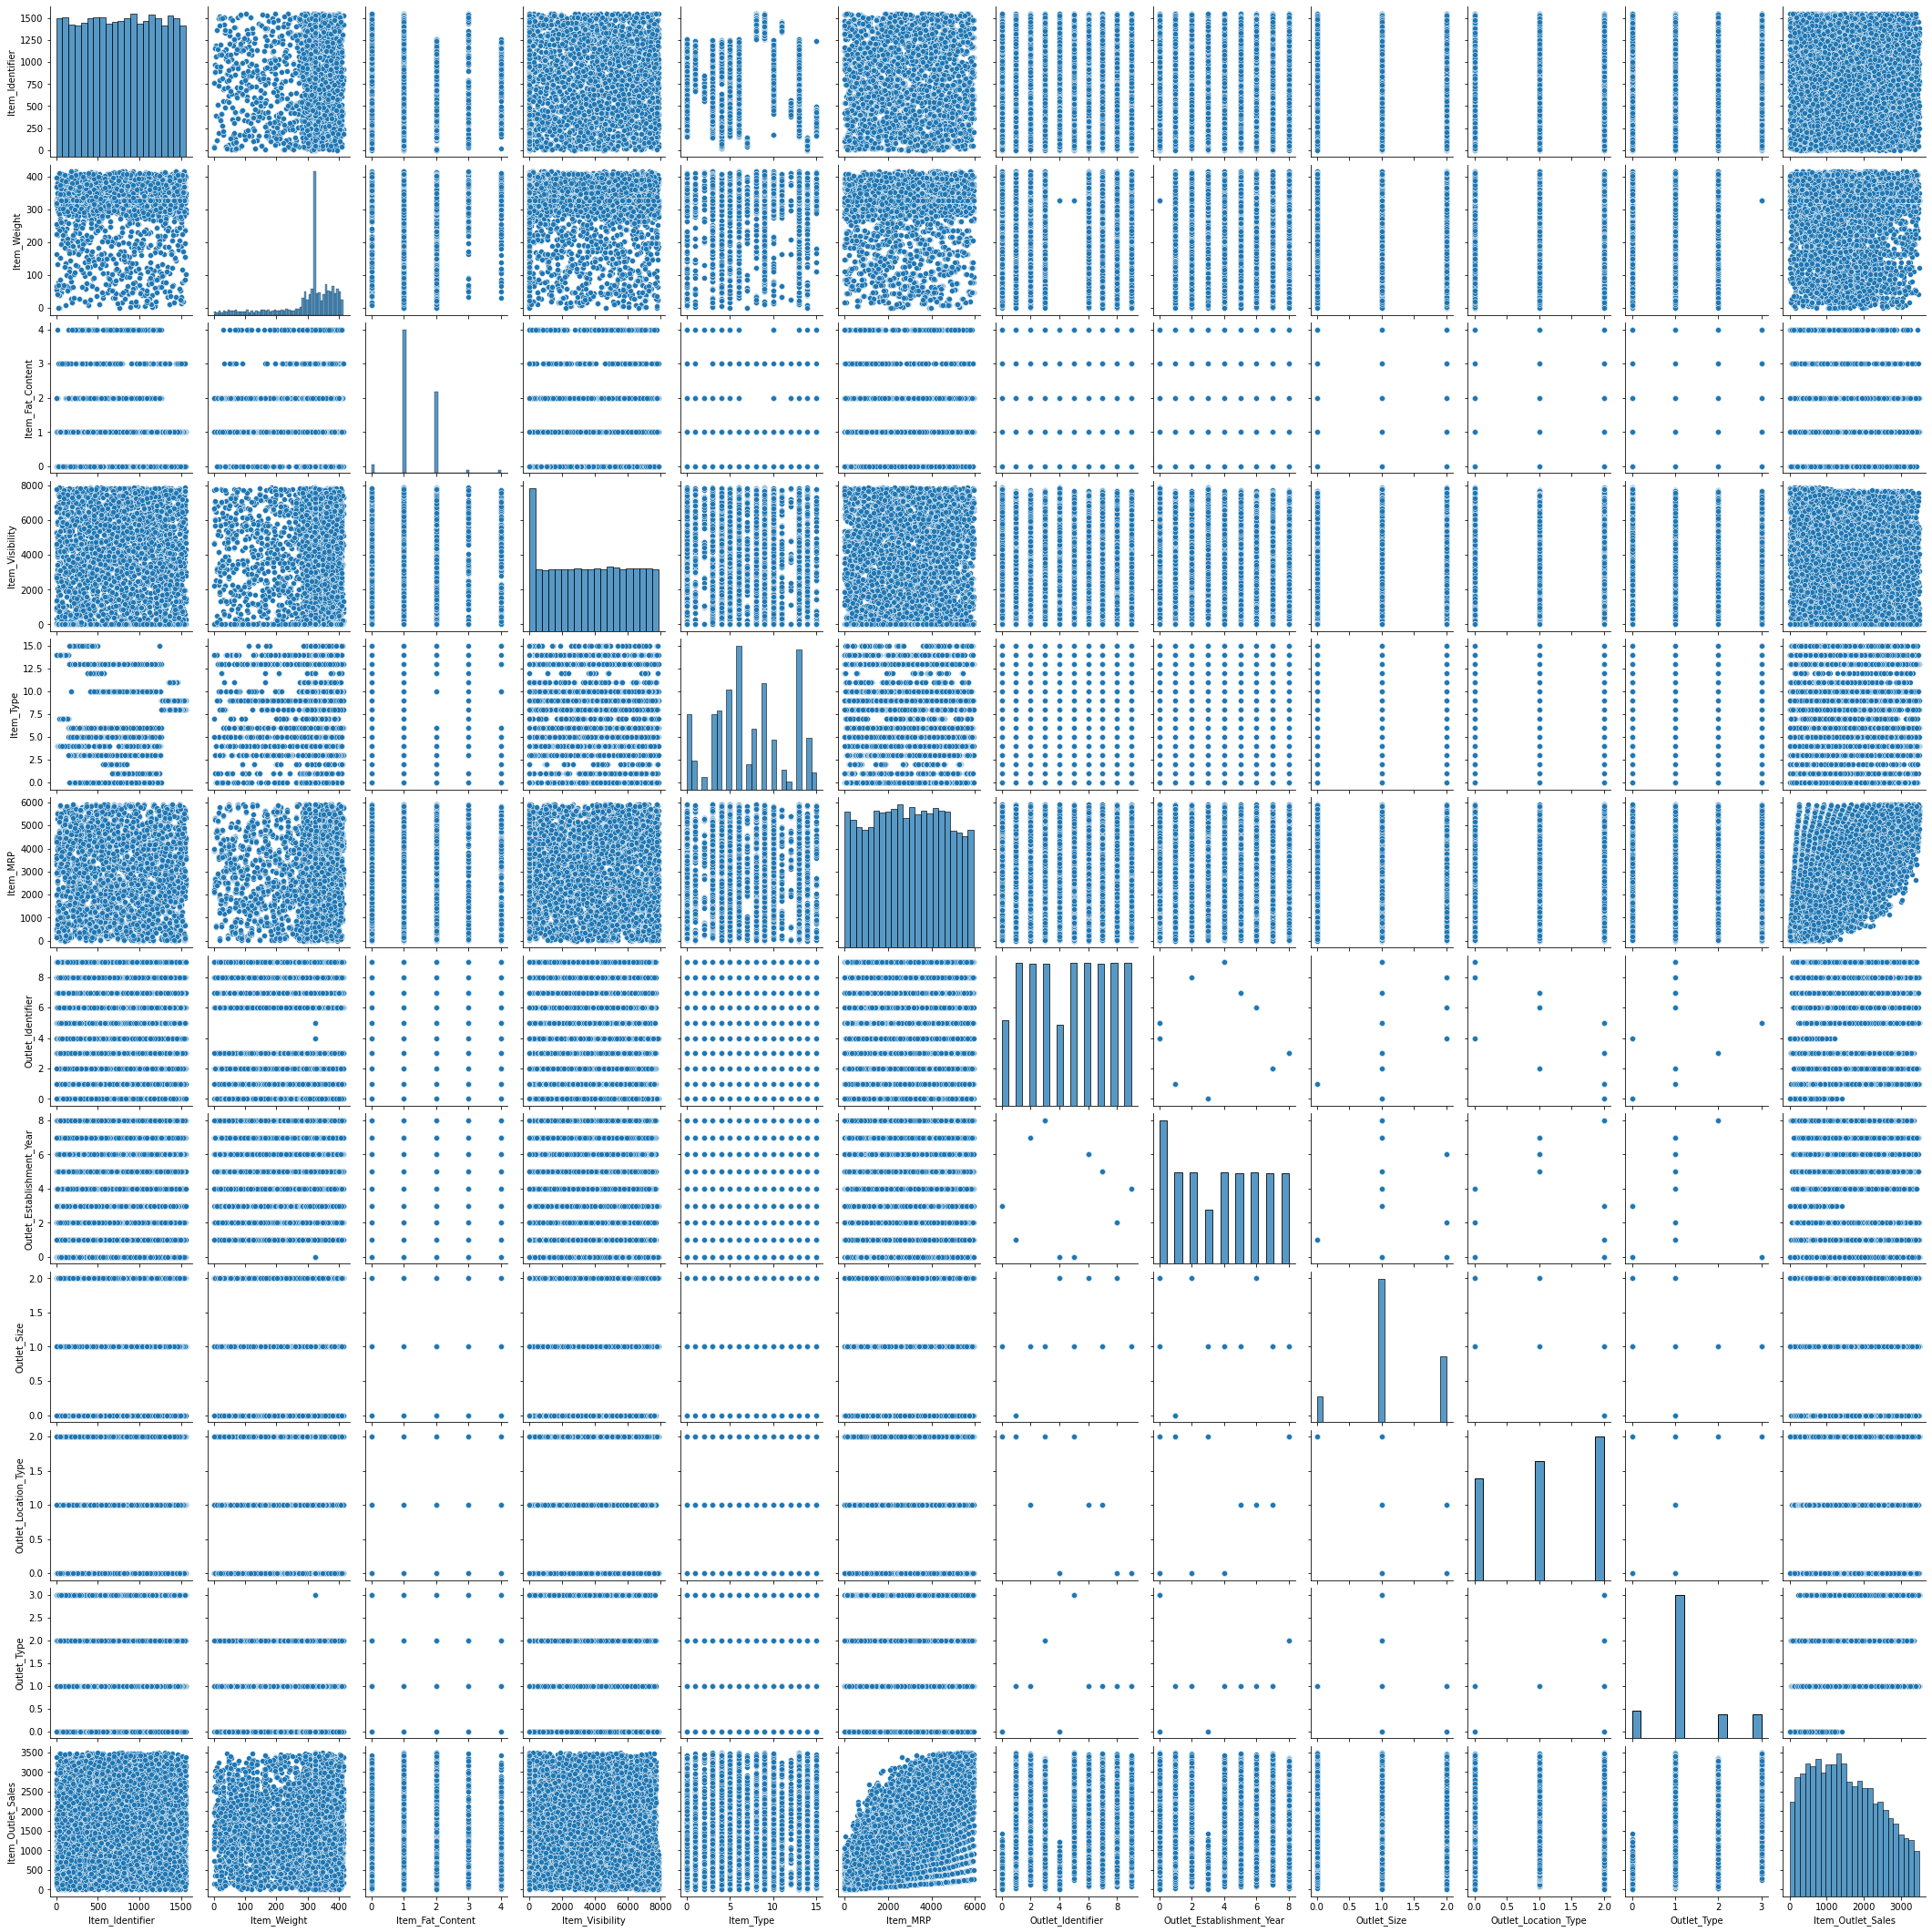

In [36]:
sns.pairplot(df)

[]

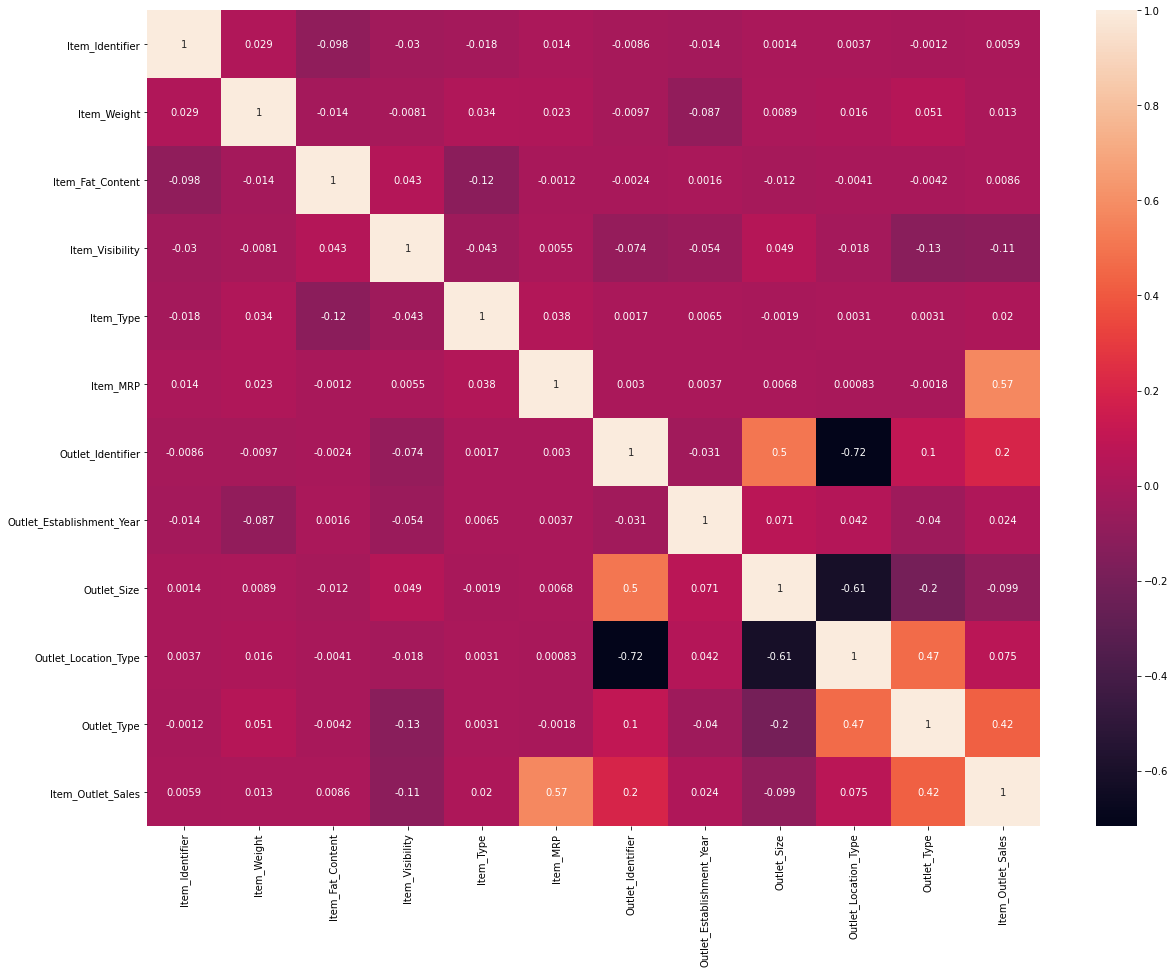

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [38]:
corr_mat = df.corr()
corr_mat

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.028921,-0.098114,-0.029999,-0.017973,0.014329,-0.008602,-0.014288,0.001389,0.003656,-0.001178,0.005916
Item_Weight,0.028921,1.000000,-0.014344,-0.008127,0.033651,0.022599,-0.009742,-0.086903,0.008921,0.015726,0.051108,0.012597
Item_Fat_Content,-0.098114,-0.014344,1.000000,0.043042,-0.115958,-0.001187,-0.002357,0.001595,-0.012058,-0.004102,-0.004214,0.008599
Item_Visibility,-0.029999,-0.008127,0.043042,1.000000,-0.043491,0.005482,-0.073962,-0.053923,0.048700,-0.018067,-0.125695,-0.109471
Item_Type,-0.017973,0.033651,-0.115958,-0.043491,1.000000,0.038449,0.001656,0.006527,-0.001859,0.003084,0.003053,0.020094
Item_MRP,0.014329,0.022599,-0.001187,0.005482,0.038449,1.000000,0.003005,0.003730,0.006802,0.000828,-0.001828,0.573191
Outlet_Identifier,-0.008602,-0.009742,-0.002357,-0.073962,0.001656,0.003005,1.000000,-0.030969,0.504603,-0.716176,0.099873,0.200320
Outlet_Establishment_Year,-0.014288,-0.086903,0.001595,-0.053923,0.006527,0.003730,-0.030969,1.000000,0.070786,0.042005,-0.040040,0.024477
Outlet_Size,0.001389,0.008921,-0.012058,0.048700,-0.001859,0.006802,0.504603,0.070786,1.000000,-0.614311,-0.201483,-0.099278
Outlet_Location_Type,0.003656,0.015726,-0.004102,-0.018067,0.003084,0.000828,-0.716176,0.042005,-0.614311,1.000000,0.467219,0.074671


In [39]:
#boxplot

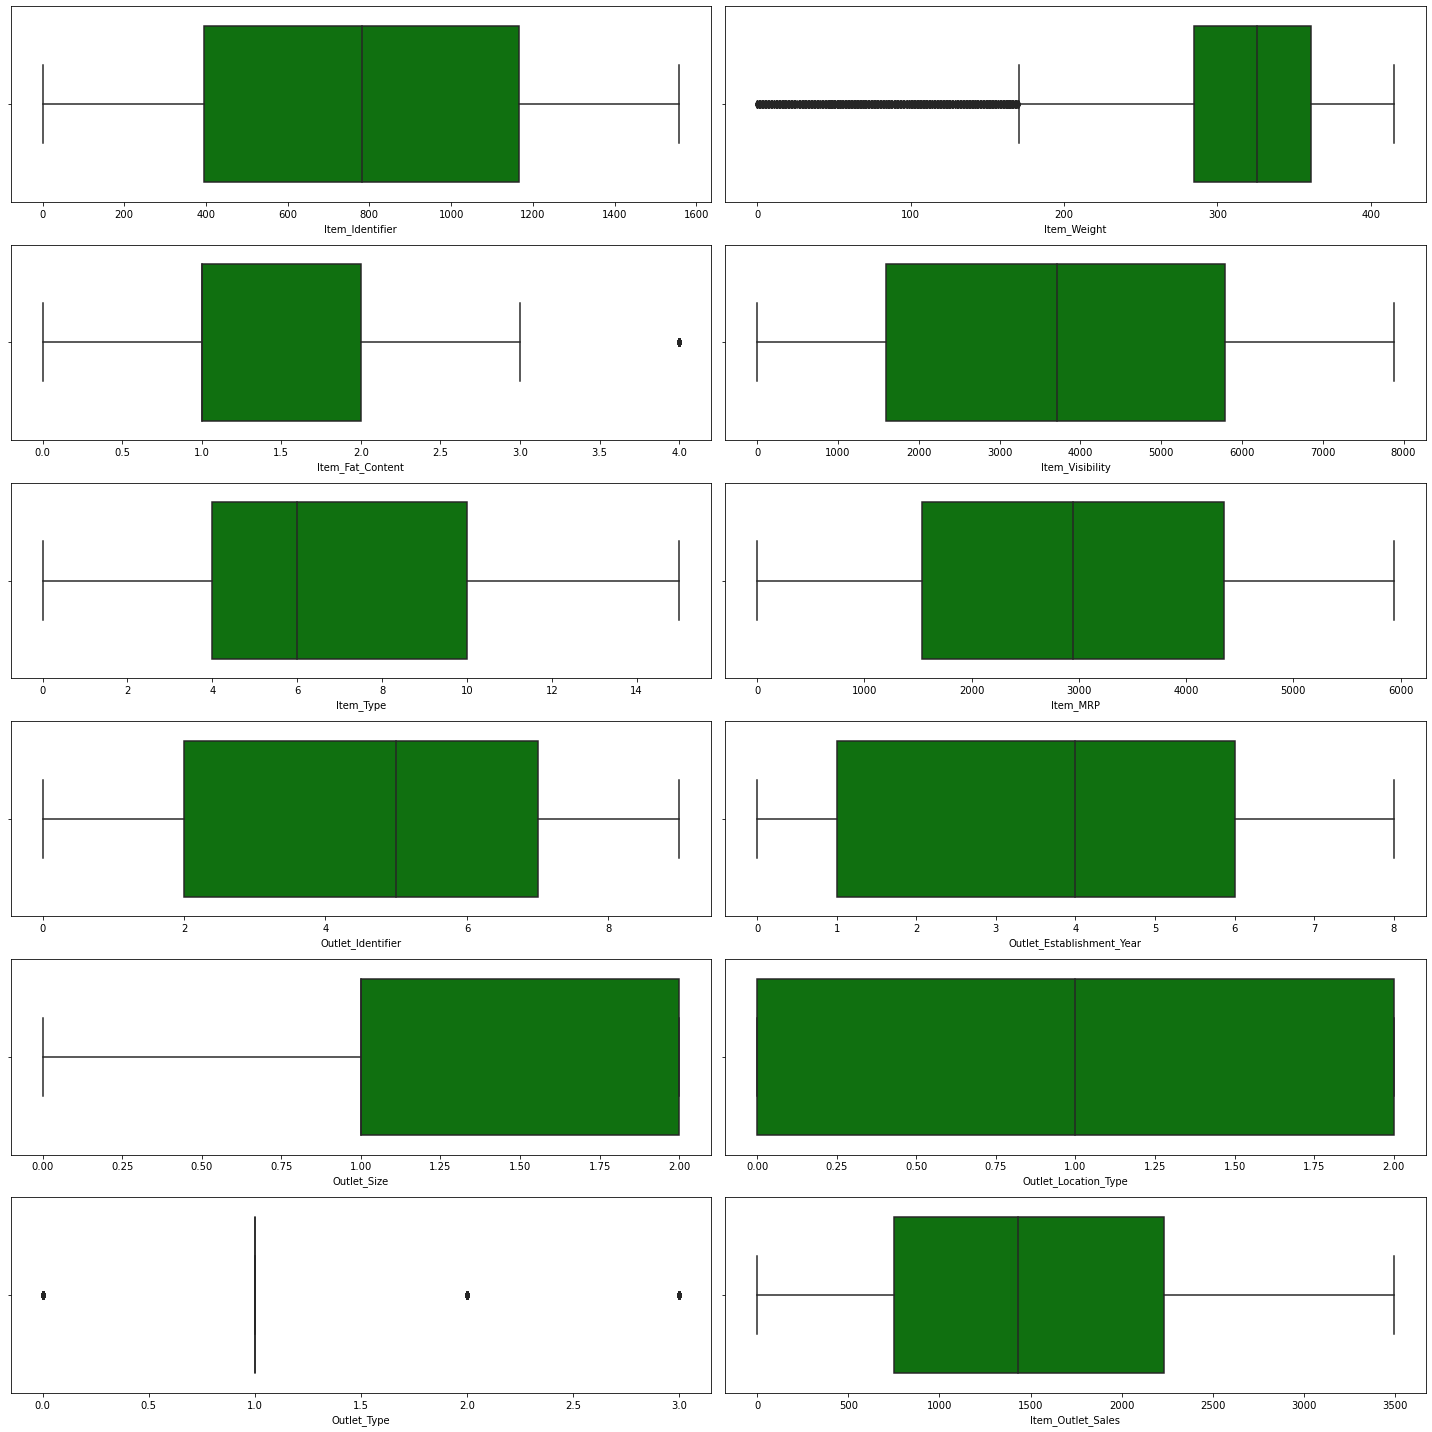

In [40]:
collist=df.columns.values
ncol=2
nrows=6
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()

In [41]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Item_Identifier            8523 non-null   int32
 1   Item_Weight                8523 non-null   int64
 2   Item_Fat_Content           8523 non-null   int32
 3   Item_Visibility            8523 non-null   int64
 4   Item_Type                  8523 non-null   int32
 5   Item_MRP                   8523 non-null   int64
 6   Outlet_Identifier          8523 non-null   int32
 7   Outlet_Establishment_Year  8523 non-null   int64
 8   Outlet_Size                8523 non-null   int32
 9   Outlet_Location_Type       8523 non-null   int32
 10  Outlet_Type                8523 non-null   int32
 11  Item_Outlet_Sales          8523 non-null   int64
dtypes: int32(7), int64(5)
memory usage: 566.1 KB


In [43]:
dfCountCols = df[['Item_Weight','Item_Visibility','Item_MRP']]

In [44]:
from scipy.stats import zscore
z = np.abs(zscore(dfCountCols))
df_new=df[(z<3).all(axis=1)]

In [45]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0])


shape before and after
shape before         : (8523, 12)
shape after          : (8466, 12)
Percentage Loss      : 0.006687785990848293


In [46]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [47]:
dfCountCols = df[['Item_Weight','Item_Visibility','Item_MRP']]

In [48]:
Q1 = dfCountCols.quantile(0.25)
Q3 = dfCountCols.quantile(0.75)
IQR = Q3 - Q1
df_new1 = df[~((dfCountCols < (Q1 - 1.5 * IQR)) |(dfCountCols > (Q3 + 1.5 * IQR))).any(axis=1)]


In [49]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new1.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new1.shape[0])/df.shape[0])


shape before and after
shape before         : (8523, 12)
shape after          : (7419, 12)
Percentage Loss      : 0.12953185498064063


In [50]:
#less consider z score

In [51]:
x = df.drop(columns=['Item_Outlet_Sales'],axis=1)
y = df['Item_Outlet_Sales']

In [52]:
x.skew()

Item_Identifier             -0.008877
Item_Weight                 -1.425559
Item_Fat_Content             0.994824
Item_Visibility              0.021566
Item_Type                    0.101655
Item_MRP                     0.000902
Outlet_Identifier           -0.059861
Outlet_Establishment_Year    0.034270
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
dtype: float64

In [53]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [54]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [55]:
df_new.skew()

Item_Identifier             -0.293700
Item_Weight                 -0.634361
Item_Fat_Content             0.032643
Item_Visibility             -0.596707
Item_Type                   -0.164574
Item_MRP                    -0.287450
Outlet_Identifier           -0.213935
Outlet_Establishment_Year   -0.219241
Outlet_Size                 -0.042980
Outlet_Location_Type        -0.220632
Outlet_Type                  0.007863
dtype: float64

In [56]:
# remove skewness

In [57]:
#so data cleaning complete proceed ml models

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [59]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.35,random_state=48)

In [61]:
lr=LinearRegression()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
ad=AdaBoostRegressor()

In [62]:
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(lr,x,y,cv=5).mean())

r2 score 0.549541162645331
503.93331116159584
394367.42278548825
0.5544924215084297


In [63]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(kn,x,y,cv=5).mean())

r2 score 0.5657435822278922
471.226072386059
380182.53856568364
0.3010198464119463


In [64]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(dt,x,y,cv=5).mean())

r2 score 0.3011352160408709
582.906836461126
611841.7064343164
0.27766906634042593


In [65]:
ad.fit(x_train,y_train)
y_pred = ad.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(ad,x,y,cv=5).mean())

r2 score 0.6288322579841386
443.1450590257401
324949.7039496524
0.6258012976794052


In [70]:
# so r2 best model is ada boost regressor 

In [71]:
# r2-cv is best model is ada boodt regressor

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {'loss':['linear', 'square', 'exponential'],
             'n_estimators' :[50,2,5,9,3,19],
              'learning_rate':[20.1,4.5,9.5,2.9,3.9],
              'random_state':[2,7,8,4,15,18,]}

gridsearch = GridSearchCV(estimator=ad,param_grid=param_grid,cv=5)
gridsearch.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [20.1, 4.5, 9.5, 2.9, 3.9],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 2, 5, 9, 3, 19],
                         'random_state': [2, 7, 8, 4, 15, 18]})

In [74]:
gridsearch.best_params_

{'learning_rate': 2.9,
 'loss': 'exponential',
 'n_estimators': 3,
 'random_state': 7}

In [75]:
mod = AdaBoostRegressor(learning_rate=2.9,loss='exponential',n_estimators=3,random_state=7)
mod.fit(x_train,y_train)
pred = mod.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2*100)

62.883225798413854


In [76]:
import joblib
joblib.dump(mod,'big data mart sales.pkl')

['big data mart sales.pkl']